MP 01/18

Demonstrate that the surrogate works for PE:

  * Run on software injection of SEOBNRv4T
  * Setup is detailed at https://github.com/benjaminlackey/gpsurrogate/wiki#pe-runs-for-paper
  * Several runs with differenet SNRs: 15,20,30,60
  * Posterior samples from `lalinference_mcmc` run for about 30 days (except for SNR20) copied into this directory.

For the plots in Ben's previous paper see Sec IV C, p. 13 of https://arxiv.org/pdf/1610.04742.pdf

TODO:
  * make 1D and 2D hist/KDE plots
  * can also plot as function of SNR

## Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [299]:
from matplotlib import rc
rc('text', usetex=True)
rc('font', family='lmodern')
rc('text.latex', unicode=True)

sns.set_style('ticks')
sns.set_context('talk')

In [290]:
from importlib import reload
import bounded_KDE
reload(bounded_KDE)
from bounded_KDE import *

In [2]:
!ls

PE_analysis.ipynb
hwinjcbc_1197041880_BNS_inj_SNR15.0.xml.gz
hwinjcbc_1197041880_BNS_inj_SNR20.0.xml.gz
hwinjcbc_1197041880_BNS_inj_SNR30.0.xml.gz
hwinjcbc_1197041880_BNS_inj_SNR60.0.xml.gz
posterior_samples_SNR15.dat
posterior_samples_SNR20.dat
posterior_samples_SNR30.dat
posterior_samples_SNR60.dat
posterior_samples_SNR60_NRTidal.dat


In [5]:
import pandas as pd

In [208]:
def parse_xml_inj(xmlfile):

    from lxml import etree

    def get_list_from_stream(st):
        stream_data = etree.tostring(stream).split()[4]
        return stream_data.decode('ascii').split(",")
    
    def get_name_from_element(el):
        name = el.items()[1][1]
        return name.split(':')[1]

    xmldoc = etree.parse(xmlfile).getroot()

    tab = xmldoc.getchildren()[2]
    stream = tab.getchildren()[-1]

    names = list(map(get_name_from_element, tab.getchildren()[:-1]))
    data = get_list_from_stream(stream)
    for i, x in enumerate(data):
        try:
            data[i] = float(x)
        except ValueError:
            pass
    
    return { k:v for (k, v) in zip(names, data) }

In [209]:
inj = parse_xml_inj('hwinjcbc_1197041880_BNS_inj_SNR15.0.xml')

In [198]:
inj

{'alpha': '0',
 'alpha1': '0',
 'alpha2': '0',
 'alpha3': '0',
 'alpha4': '0',
 'alpha5': '0',
 'alpha6': '0',
 'amp_order': '0',
 'bandpass': '0',
 'beta': '0',
 'coa_phase': '0',
 'distance': '146.04537',
 'eff_dist_g': '0',
 'eff_dist_h': '415.64394',
 'eff_dist_l': '362.07645',
 'eff_dist_t': '0',
 'eff_dist_v': '278.93368',
 'end_time_gmst': '0',
 'eta': '0.25',
 'f_final': '0',
 'f_lower': '18',
 'g_end_time': '0',
 'g_end_time_ns': '0',
 'geocent_end_time': '1197042098',
 'geocent_end_time_ns': '0',
 'h_end_time': '1197042097',
 'h_end_time_ns': '999550819',
 'inclination': '0.52359878',
 'l_end_time': '1197042097',
 'l_end_time_ns': '992923259',
 'lambda1': '1286',
 'lambda2': '1286',
 'latitude': '-0.6981317',
 'longitude': '3.8397244',
 'mass1': '1.4',
 'mass2': '1.4',
 'mchirp': '1.2187708',
 'numrel_data': '""',
 'numrel_mode_max': '0',
 'numrel_mode_min': '0',
 'phi0': '0',
 'polarization': '0',
 'process_id': '"sim_inspiral:process_id:0"',
 'psi0': '0',
 'psi3': '0',
 'si

In [170]:
pos15 = np.genfromtxt('posterior_samples_SNR15.dat', names=True)
pos20 = np.genfromtxt('posterior_samples_SNR20.dat', names=True)
pos30 = np.genfromtxt('posterior_samples_SNR30.dat', names=True)
pos60 = np.genfromtxt('posterior_samples_SNR60.dat', names=True)
pos60NRT = np.genfromtxt('posterior_samples_SNR60_NRTidal.dat', names=True)

In [7]:
pos15.dtype.names

('m2',
 'nlocaltemps',
 'dist',
 'chain_delta_log_evidence',
 'af',
 'v1_optimal_snr',
 'f_ref',
 'psdscaleflag',
 'h1l1_relative_phase',
 'chain_log_noise_evidence',
 'l1_optimal_snr',
 'mtotal',
 'logll1',
 'signalmodelflag',
 'logl',
 'nulllogl',
 'lambda2',
 'h1_cplx_snr_arg',
 'sky_frame',
 'temperature',
 'segmentstart',
 'deltalogl',
 'h1_cplx_snr_amp',
 'lambda1',
 'loglv1',
 'm1',
 'ra',
 'v1_cplx_snr_arg',
 'dlam_tilde',
 'l_peak',
 'lal_pnorder',
 'h1v1_relative_phase',
 'chain_log_bayes_factor',
 'psi',
 'nifo',
 'loglh1',
 'costheta_jn',
 'a2z',
 'time',
 'segmentlength',
 'a1',
 'a2',
 'ntemps',
 'chain_log_evidence',
 'optimal_snr',
 'alpha',
 'a1z',
 'phase_maxl',
 'lam_tilde',
 'l1v1_relative_phase',
 'theta_jn',
 'randomseed',
 'mc',
 'l1_cplx_snr_amp',
 'logprior',
 'logpost',
 'flow',
 'l1_cplx_snr_arg',
 't0',
 'chi_eff',
 'q',
 'v1_cplx_snr_amp',
 'eta',
 'lal_approximant',
 'h1_optimal_snr',
 'azimuth',
 'lal_amporder',
 'dec',
 'samplerate',
 'matched_filter_snr

## 1D plots

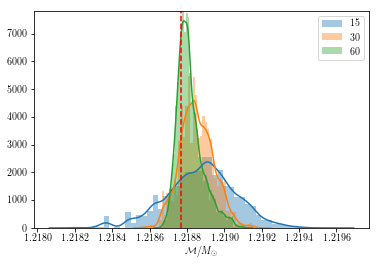

In [233]:
sns.distplot(pos15['mc'], label='15')
#sns.distplot(pos20['mc'], label='20')
sns.distplot(pos30['mc'], label='30')
sns.distplot(pos60['mc'], label='60')
plt.axvline(inj['mchirp'], c='r', ls='--');
plt.xlabel(r'$\mathcal{M}/M_\odot$')
plt.legend();

In [217]:
def Lambda_tilde(m1, m2, lam1, lam2):
    return 16.0/13.0 * ( (m1+12.0*m2)*lam1*m1**4 + (m2+12.0*m1)*lam2*m2**4) / (m1+m2)**5

In [220]:
inj_lamda_tilde = Lambda_tilde(inj['mass1'], inj['mass2'], inj['lambda1'], inj['lambda2'])

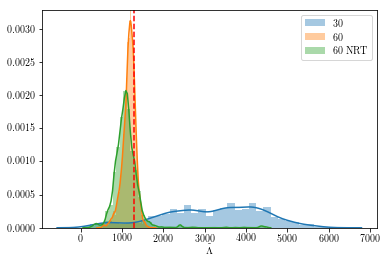

In [235]:
# sns.distplot(pos15['lam_tilde'], label='15');
# sns.distplot(pos20['lam_tilde'], label='20');
sns.distplot(pos30['lam_tilde'], label='30');
sns.distplot(pos60['lam_tilde'], label='60');
sns.distplot(pos60NRT['lam_tilde'], label='60 NRT');
plt.axvline(inj_lamda_tilde, c='r', ls='--');
plt.xlabel(r'$\tilde\Lambda$')
plt.legend();

## 2D KDE plots of lambda1-lambda2

In [265]:
lam1_15 = pd.Series(pos15['lambda1'], name=r'$\Lambda_1$')
lam2_15 = pd.Series(pos15['lambda2'], name=r'$\Lambda_2$')

lam1_20 = pd.Series(pos20['lambda1'], name=r'$\Lambda_1$')
lam2_20 = pd.Series(pos20['lambda2'], name=r'$\Lambda_2$')

lam1_30 = pd.Series(pos30['lambda1'], name=r'$\Lambda_1$')
lam2_30 = pd.Series(pos30['lambda2'], name=r'$\Lambda_2$')

lam1_60 = pd.Series(pos60['lambda1'], name=r'$\Lambda_1$')
lam2_60 = pd.Series(pos60['lambda2'], name=r'$\Lambda_2$')

lam1_60NRT = pd.Series(pos60NRT['lambda1'], name=r'$\Lambda_1$')
lam2_60NRT = pd.Series(pos60NRT['lambda2'], name=r'$\Lambda_2$')

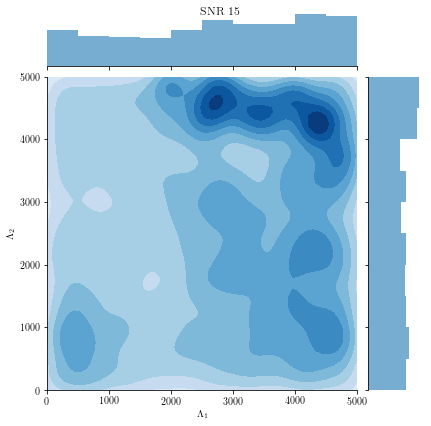

In [267]:
g = sns.JointGrid(lam1_15, lam2_15)
g = g.plot_joint(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)
_ = g.ax_marg_x.hist(lam1_15, alpha=.6)
_ = g.ax_marg_y.hist(lam2_15, alpha=.6, orientation="horizontal");
plt.xlim([0, 5000])
plt.ylim([0, 5000])
plt.suptitle('SNR 15');
plt.savefig('./lambda12_SNR15.pdf');

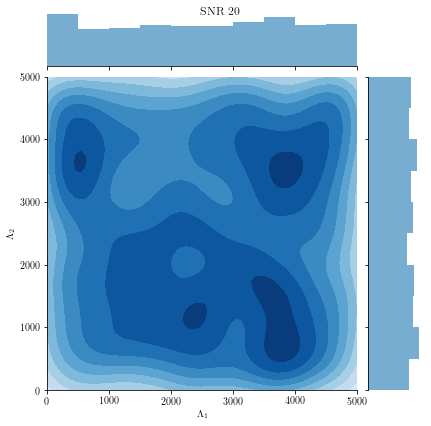

In [268]:
g = sns.JointGrid(lam1_20, lam2_20)
g = g.plot_joint(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)
_ = g.ax_marg_x.hist(lam1_20, alpha=.6)
_ = g.ax_marg_y.hist(lam2_20, alpha=.6, orientation="horizontal");
plt.xlim([0, 5000])
plt.ylim([0, 5000])
plt.suptitle('SNR 20');
plt.savefig('./lambda12_SNR20.pdf');

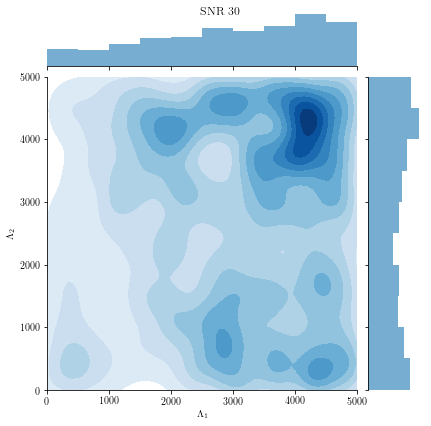

In [263]:
g = sns.JointGrid(lam1_30, lam2_30)
g = g.plot_joint(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)
_ = g.ax_marg_x.hist(lam1_30, alpha=.6)
_ = g.ax_marg_y.hist(lam2_30, alpha=.6, orientation="horizontal");
plt.xlim([0, 5000])
plt.ylim([0, 5000])
plt.suptitle('SNR 30');
plt.savefig('./lambda12_SNR30.pdf');

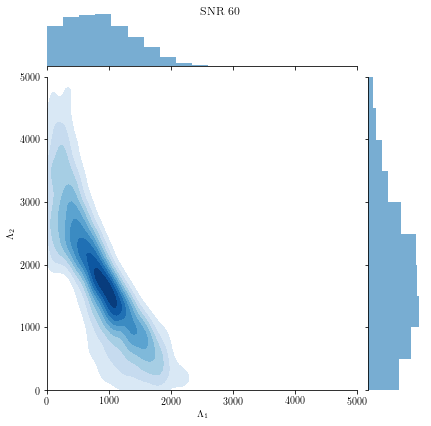

In [264]:
g = sns.JointGrid(lam1_60, lam2_60)
g = g.plot_joint(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)
_ = g.ax_marg_x.hist(lam1_60, alpha=.6)
_ = g.ax_marg_y.hist(lam2_60, alpha=.6, orientation="horizontal");
plt.xlim([0, 5000])
plt.ylim([0, 5000])
plt.suptitle('SNR 60');
plt.savefig('./lambda12_SNR60.pdf');

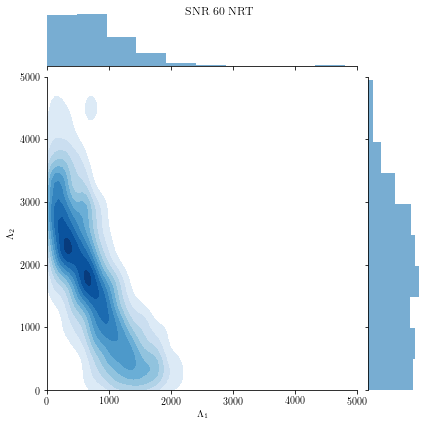

In [266]:
g = sns.JointGrid(lam1_60NRT, lam2_60NRT)
g = g.plot_joint(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)
_ = g.ax_marg_x.hist(lam1_60NRT, alpha=.6)
_ = g.ax_marg_y.hist(lam2_60NRT, alpha=.6, orientation="horizontal");
plt.xlim([0, 5000])
plt.ylim([0, 5000])
plt.suptitle('SNR 60 NRT');
plt.savefig('./lambda12_SNR60NRT.pdf');

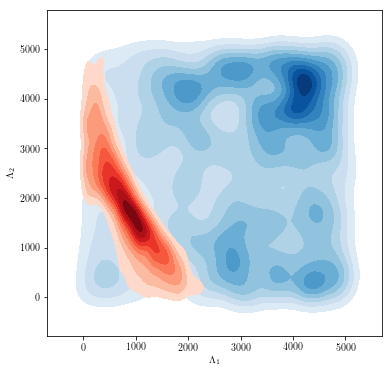

In [269]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(lam1_30, lam2_30, ax=ax, cmap="Blues", shade=True, shade_lowest=False)
sns.kdeplot(lam1_60, lam2_60, ax=ax, cmap="Reds", shade=True, shade_lowest=False);

/usr/local/lib/python3.4/site-packages/matplotlib/contour.py:909: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')
/usr/local/lib/python3.4/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'ylim', 'xlim'
  s)
/usr/local/lib/python3.4/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


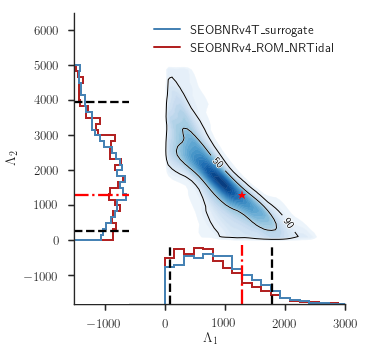

In [304]:
xlim=(-1500, 3000)
ylim=(-1800, 6500)

lam1 = lam1_60
lam2 = lam2_60

colors = ["steelblue", "firebrick"]

ratio=5
grds = 50
credible_interval=[5,95]
gs = plt.GridSpec(ratio + 1, ratio + 1)
g = sns.JointGrid(lam1, lam2, xlim=xlim, ylim=ylim, space=0, ratio=ratio)
g = g.plot_joint(plot_bounded_2d_kde, xlow=0, xhigh=5000, ylow=0, yhigh=5000, cmap="Blues", shade=True,shade_lowest=False, n_levels=30, gridsize=grds)
plot_bounded_2d_kde(lam1, lam2, xlow=0, xhigh=5000, ylow=0, yhigh=5000, xlim=xlim, ylim=ylim, levels=[.5, .9], gridsize=grds)

plt.plot([inj['lambda1']], [inj['lambda2']], 'r*')

_ = g.ax_marg_x.hist([lam1, lam1_60NRT], color=colors, bins=30, histtype='step', linewidth=2, normed=True)
qvalues = np.percentile(lam1, credible_interval)
for q in qvalues:
    g.ax_marg_x.axvline(q, ls="dashed", color='k')
g.ax_marg_x.axvline(inj['lambda1'], ls="-.", color='r')
g.ax_marg_x.set_position(gs[ratio, :-1].get_position(g.fig))

#_ = g.ax_marg_y.hist(lam2, color=".7", orientation="horizontal", bins=30, histtype='stepfilled', linewidth=2, normed=True)
_ = g.ax_marg_y.hist([lam2, lam2_60NRT], color=colors, orientation="horizontal", bins=30, histtype='step', linewidth=2, normed=True)
qvalues = np.percentile(lam2, credible_interval)
for q in qvalues:
    g.ax_marg_y.axhline(q, ls="dashed", color='k')
g.ax_marg_y.axhline(inj['lambda2'], ls="-.", color='r')
g.ax_marg_y.set_position(gs[1:, 0].get_position(g.fig))

g.fig.get_axes()[0].legend([plt.Line2D([0,0], [1,0], color=colors[0], linewidth=2),
                            plt.Line2D([0,0], [1,0], color=colors[1], linewidth=2)],
                           ['SEOBNRv4T\_surrogate', 'SEOBNRv4\_ROM\_NRTidal'], loc='upper right')

g.fig.savefig('./lambda12_SNR60_compare.pdf', bbox_inches='tight', bbox_extra_artists=[])

## masses

In [306]:
m1_60 = pd.Series(pos60['m1'], name=r'$m_1 / \mathrm{M}_\odot$')
m2_60 = pd.Series(pos60['m2'], name=r'$m_2 / \mathrm{M}_\odot$')

m1_60NRT = pd.Series(pos60NRT['m1'], name=r'$m_1 / \mathrm{M}_\odot$')
m2_60NRT = pd.Series(pos60NRT['m2'], name=r'$m_2 / \mathrm{M}_\odot$')

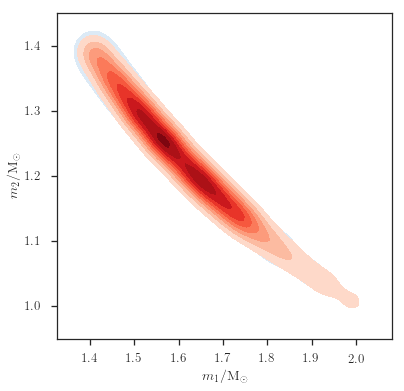

In [310]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(m1_60, m2_60, ax=ax, cmap="Blues", shade=True, shade_lowest=False);
sns.kdeplot(m1_60NRT, m2_60NRT, ax=ax, cmap="Reds", shade=True, shade_lowest=False);

/usr/local/lib/python3.4/site-packages/matplotlib/contour.py:909: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')
/usr/local/lib/python3.4/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'ylim', 'xlim'
  s)
/usr/local/lib/python3.4/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


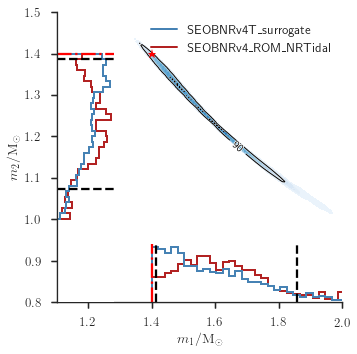

In [319]:
xlim=(1.1, 2)
ylim=(0.8, 1.5)

m1 = m1_60
m2 = m2_60

colors = ["steelblue", "firebrick"]

ratio = 5
grds = 100
credible_interval=[5,95]
gs = plt.GridSpec(ratio + 1, ratio + 1)
g = sns.JointGrid(m1, m2, xlim=xlim, ylim=ylim, space=0, ratio=ratio)
# needs a large number of points
# g = g.plot_joint(plot_bounded_2d_kde, transform=ms2q, yhigh=1.0, cmap="Blues", shade=True, shade_lowest=False, n_levels=30, gridsize=grds)
# plot_bounded_2d_kde(m1, m2, transform=ms2q, yhigh=1.0, xlim=xlim, ylim=ylim, levels=[.5, .9], gridsize=grds)
g = g.plot_joint(plot_bounded_2d_kde, cmap="Blues", shade=True, shade_lowest=False, n_levels=30, gridsize=grds)
plot_bounded_2d_kde(m1, m2, xlim=xlim, ylim=ylim, levels=[.5, .9], gridsize=grds)

plt.plot([inj['mass1']], [inj['mass2']], 'r*')

_ = g.ax_marg_x.hist([m1, m1_60NRT], color=colors, bins=30, histtype='step', linewidth=2, normed=True)
qvalues = np.percentile(m1, credible_interval)
for q in qvalues:
    g.ax_marg_x.axvline(q, ls="dashed", color='k')
g.ax_marg_x.axvline(inj['mass1'], ls="-.", color='r')
g.ax_marg_x.set_position(gs[ratio, :-1].get_position(g.fig))

#_ = g.ax_marg_y.hist(m2, color=".7", orientation="horizontal", bins=30, histtype='stepfilled', linewidth=2, normed=True)
_ = g.ax_marg_y.hist([m2, m2_60NRT], color=colors, orientation="horizontal", bins=30, histtype='step', linewidth=2, normed=True)
qvalues = np.percentile(m2, credible_interval)
for q in qvalues:
    g.ax_marg_y.axhline(q, ls="dashed", color='k')
g.ax_marg_y.axhline(inj['mass2'], ls="-.", color='r')
g.ax_marg_y.set_position(gs[1:, 0].get_position(g.fig))

g.fig.get_axes()[0].legend([plt.Line2D([0,0], [1,0], color=colors[0], linewidth=2),
                            plt.Line2D([0,0], [1,0], color=colors[1], linewidth=2)],
                           ['SEOBNRv4T\_surrogate', 'SEOBNRv4\_ROM\_NRTidal'], loc='upper right')

g.fig.savefig('./masses_SNR60_compare.pdf', bbox_inches='tight', bbox_extra_artists=[])

## Spins

In [322]:
chi1_60 = pd.Series(pos60['a1z'], name=r'$\chi_1$')
chi2_60 = pd.Series(pos60['a2z'], name=r'$\chi_2$')

chi1_60NRT = pd.Series(pos60NRT['a1z'], name=r'$\chi_1$')
chi2_60NRT = pd.Series(pos60NRT['a2z'], name=r'$\chi_2$')

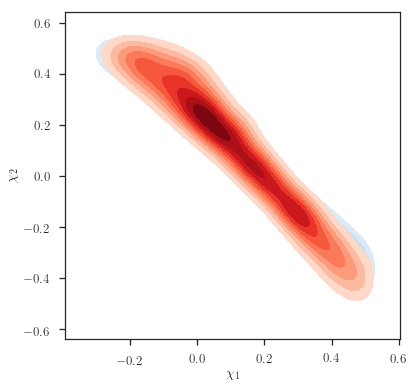

In [323]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(chi1_60, chi2_60, ax=ax, cmap="Blues", shade=True, shade_lowest=False);
sns.kdeplot(chi1_60NRT, chi2_60NRT, ax=ax, cmap="Reds", shade=True, shade_lowest=False);

/usr/local/lib/python3.4/site-packages/matplotlib/contour.py:909: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')
/usr/local/lib/python3.4/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'ylo2'
  s)
/usr/local/lib/python3.4/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'ylim', 'xlim'
  s)
/usr/local/lib/python3.4/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


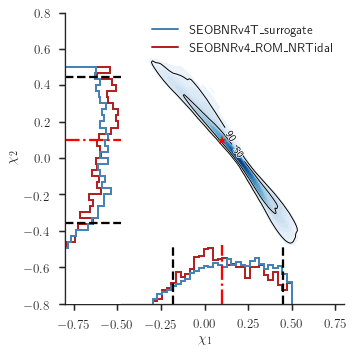

In [328]:
xlim=(-0.8, 0.8)
ylim=(-0.8, 0.8)

chi1 = chi1_60
chi2 = chi2_60

colors = ["steelblue", "firebrick"]

ratio = 5
grds = 100
credible_interval=[5,95]
gs = plt.GridSpec(ratio + 1, ratio + 1)
g = sns.JointGrid(chi1, chi2, xlim=xlim, ylim=ylim, space=0, ratio=ratio)
g = g.plot_joint(plot_bounded_2d_kde, xlow=-1, xhigh=1, ylo2=-1, yhigh=1, cmap="Blues", shade=True, shade_lowest=False, n_levels=30, gridsize=grds)
plot_bounded_2d_kde(chi1, chi2, xlow=-1, xhigh=1, ylow=-1, yhigh=1, xlim=xlim, ylim=ylim, levels=[.5, .9], gridsize=grds)

plt.plot([inj['spin1z']], [inj['spin2z']], 'r*')

_ = g.ax_marg_x.hist([chi1, chi1_60NRT], color=colors, bins=30, histtype='step', linewidth=2, normed=True)
qvalues = np.percentile(chi1, credible_interval)
for q in qvalues:
    g.ax_marg_x.axvline(q, ls="dashed", color='k')
g.ax_marg_x.axvline(inj['spin1z'], ls="-.", color='r')
g.ax_marg_x.set_position(gs[ratio, :-1].get_position(g.fig))

#_ = g.ax_marg_y.hist(chi2, color=".7", orientation="horizontal", bins=30, histtype='stepfilled', linewidth=2, normed=True)
_ = g.ax_marg_y.hist([chi2, chi2_60NRT], color=colors, orientation="horizontal", bins=30, histtype='step', linewidth=2, normed=True)
qvalues = np.percentile(chi2, credible_interval)
for q in qvalues:
    g.ax_marg_y.axhline(q, ls="dashed", color='k')
g.ax_marg_y.axhline(inj['spin2z'], ls="-.", color='r')
g.ax_marg_y.set_position(gs[1:, 0].get_position(g.fig))

g.fig.get_axes()[0].legend([plt.Line2D([0,0], [1,0], color=colors[0], linewidth=2),
                            plt.Line2D([0,0], [1,0], color=colors[1], linewidth=2)],
                           ['SEOBNRv4T\_surrogate', 'SEOBNRv4\_ROM\_NRTidal'], loc='upper right')

g.fig.savefig('./spins_SNR60_compare.pdf', bbox_inches='tight', bbox_extra_artists=[])

## Effective quantities